# Case Study 2.1: Predicting Wage I

Instructor: Victor Chernuzkov
Activity Type: Optional 
Case Study Description: Predict wages using various characteristics of workers and assess predictive performance.
Why this Case Study? Prediction is getting important these days in the age of big data. Participants can apply a simple model from this class and assess the prediction performance of their model.
Self-Help Package Contents: 

The video that covers this case study is given in Module 2, Segment 1.4.

 Self-Help-Package.zip

Codebook.rtf contains the description of worker job-relevant characteristics.
pay.discrimination.Rdata: the CPS (2012) data on wages and job-relevant worker characteristics, such as experience, gender, education.
Regression1.4.CaseStudy.R predicts expected wage given worker characteristics using linear model with linear and quadratic specifications.
In addition, it evaluates the performance of the predictor by: r.squared and mean squared error, with and without sample splitting.Regression.1.4.pdf is the set of slides describing the wage prediction model.
.Rhistory
Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Getting Data

In [2]:
# Codebook for pay.discrimination.Rdata dataset.
# 05/09/2016

# The dataset is compiled from 2012 Current Population Survey, March Supplement.
# The sample includes never-married individuals who are either collage or high school
# graduates or have some collage education.

# The dataset contains the following variables:

# wage   : weekly wage
# female : female dummy
# cg     : collage Graduate Dummy
# sc     : some collage dummy
# hsg    : High School graduate dummy
# mw     : midwest dummy
# so     : south dummy
# we     : west dummy
# ne     : northeast dummy
# exp1   : experience(year)
# exp2   : experience squared
# exp3   : experinence cubed

#wage ~ female + sc+ cg+ mw + so + we + exp1 + exp2 + exp3 (features used in the referece program in R)
# >ignoring the following ones: hsg, ne

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset.head(5)

,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3,wage
0,0,0,0,1,0,0,0,1,33.0,10.89,35.937,11.659091
1,0,1,0,0,0,0,0,1,27.0,7.29,19.683,12.825000
2,0,0,1,0,0,0,0,1,13.0,1.69,2.197,5.777027
3,0,1,0,0,0,0,0,1,2.0,0.04,0.008,12.468750
4,1,1,0,0,0,0,0,1,15.0,2.25,3.375,18.525000


## Exploring the data: Descriptive statistics and visualizing

In [5]:
#Descriptive statistics
display(dataset.describe())

,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3,wage
count,3835.000000,3835.000000,3835.000000,3835.00000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.417992,0.376271,0.323859,0.29987,0.287614,0.243546,0.211734,0.257106,13.353194,2.529267,5.812103,15.533356
std,0.493293,0.484513,0.468008,0.45826,0.452709,0.429278,0.408591,0.437095,8.639348,2.910554,9.033207,13.518165
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.040000,0.008000,0.004275
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,0.360000,0.216000,9.618750
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,11.000000,1.210000,1.331000,13.028571
75%,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,19.500000,3.802500,7.414875,17.812500
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,35.000000,12.250000,42.875000,348.333017


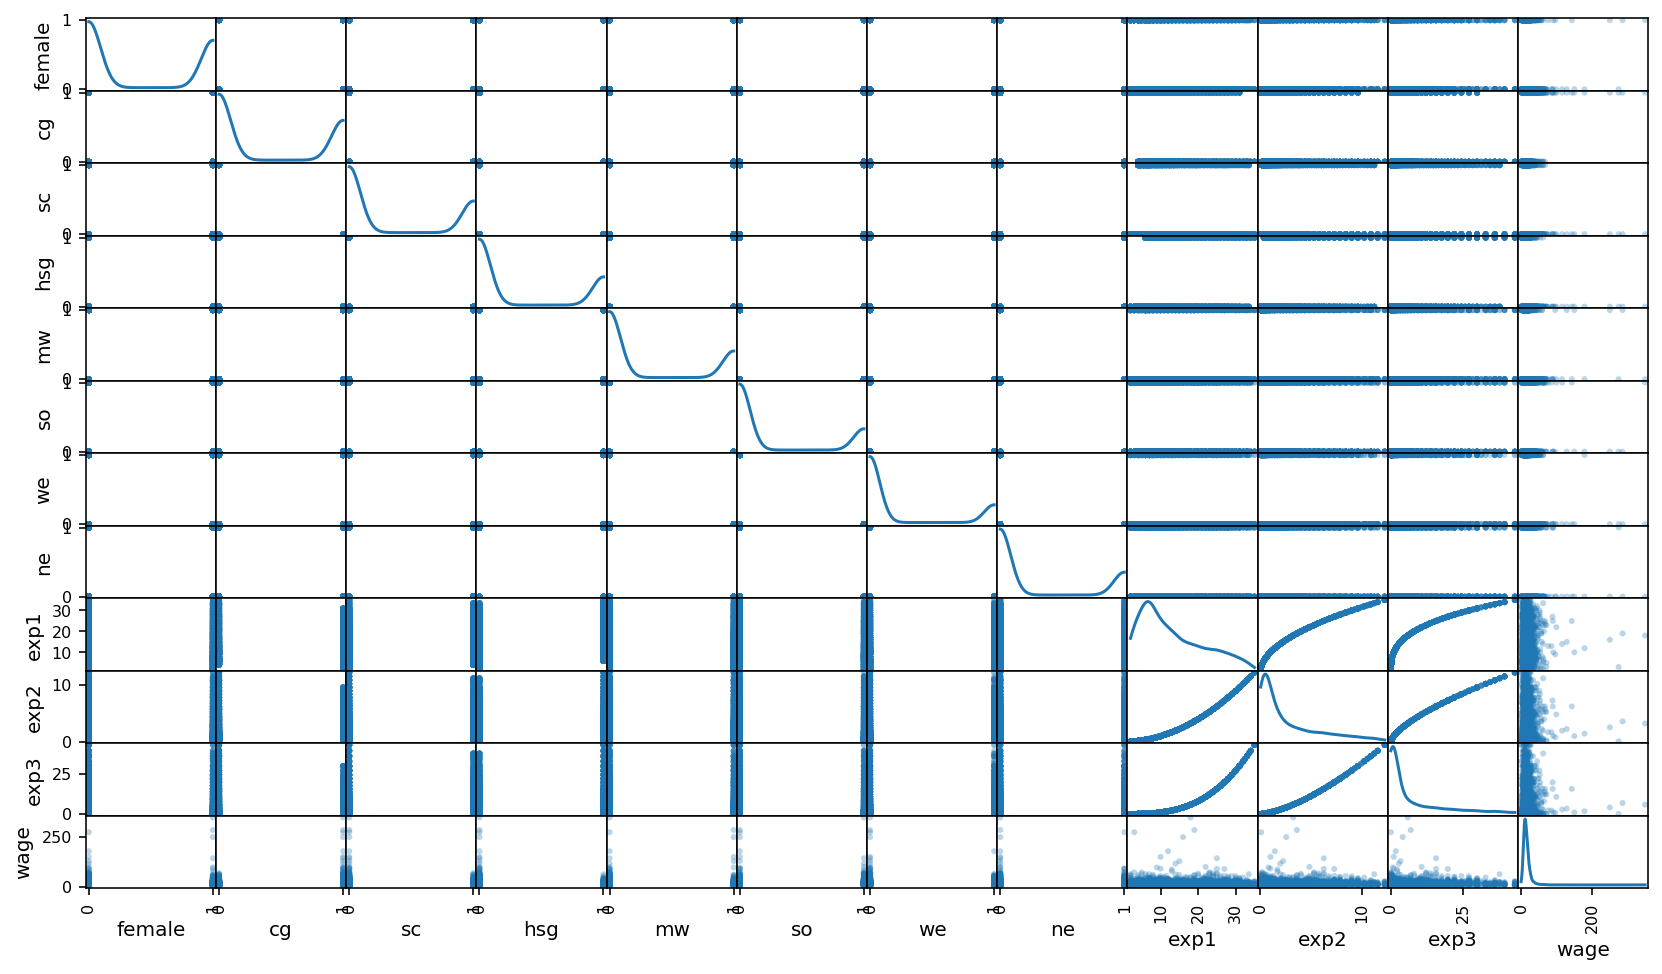

In [6]:
#Distributions
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

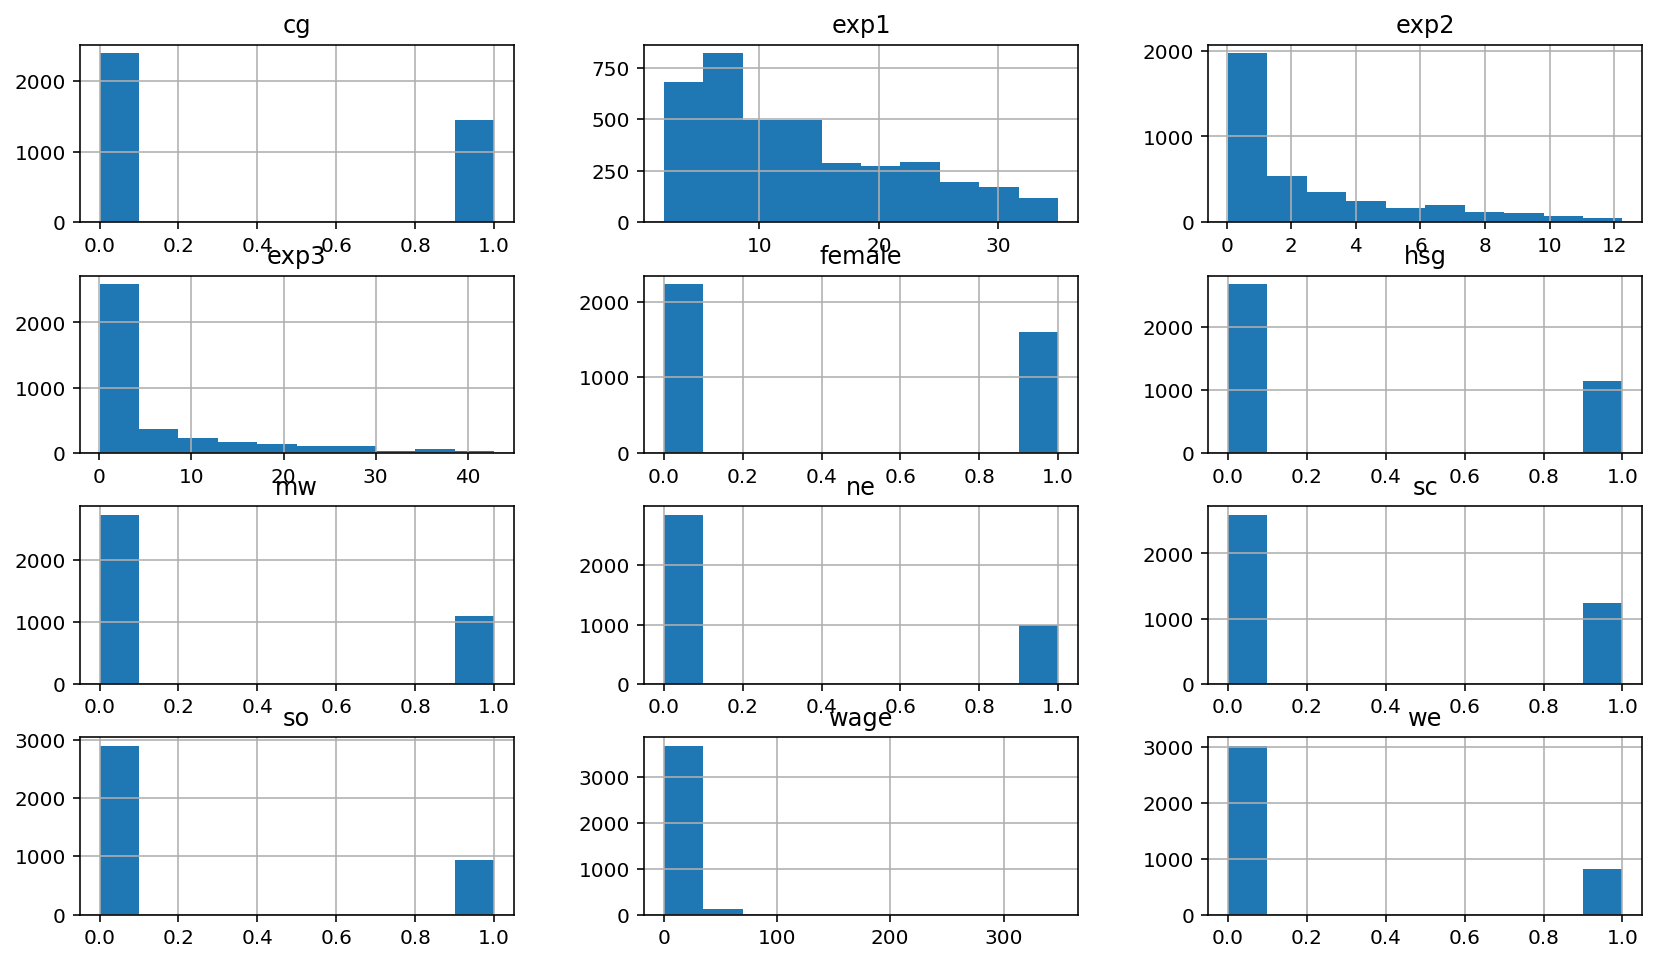

In [7]:
dataset.hist(figsize = (14,8));

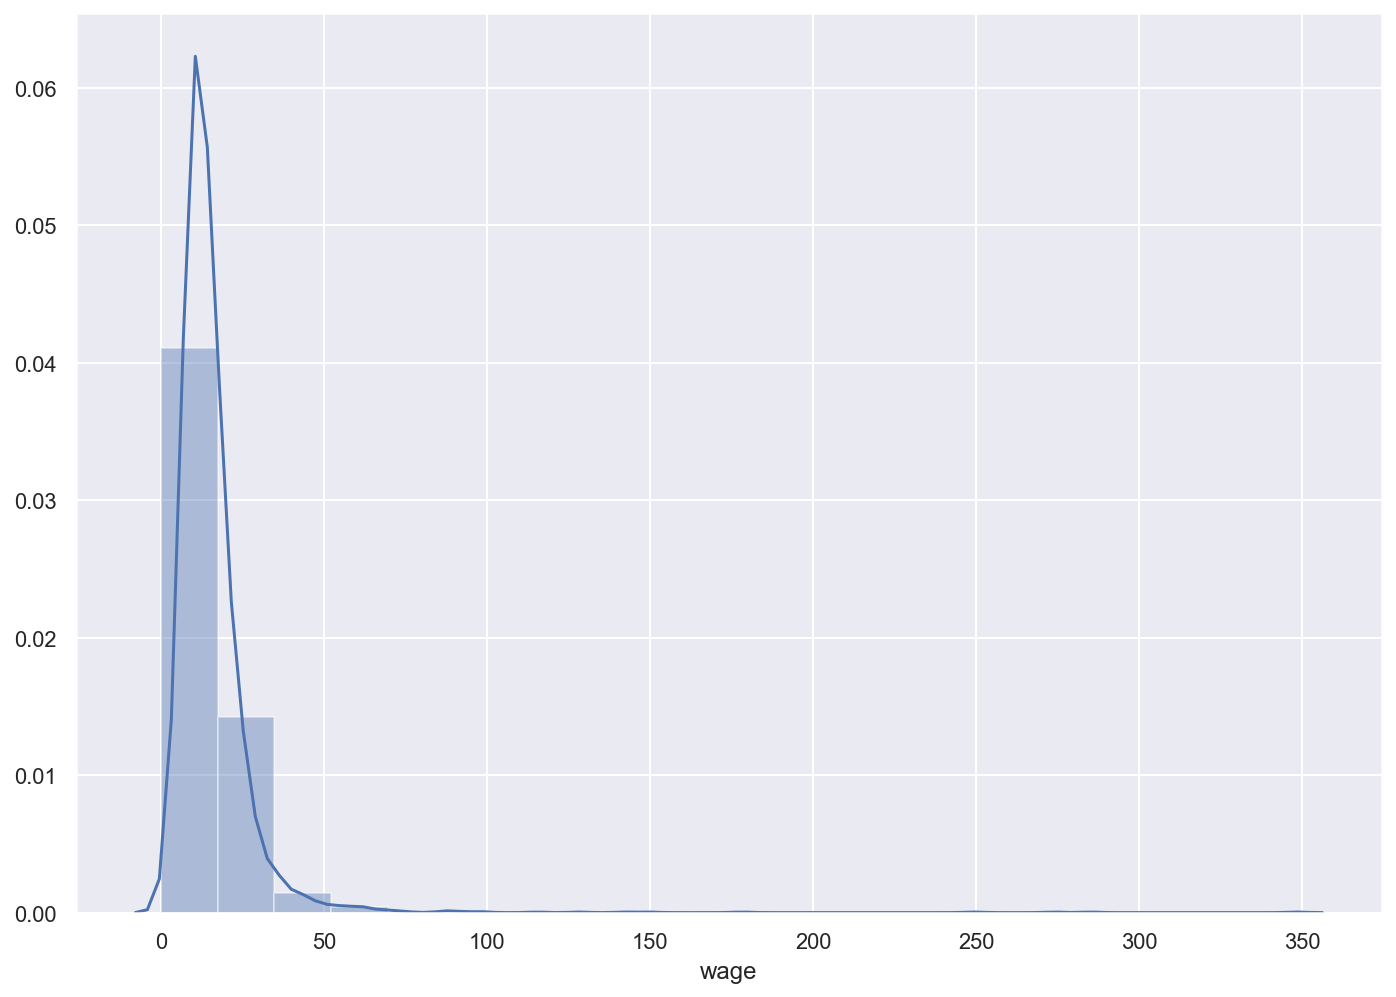

In [8]:
#distribution for the target
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['wage'], bins=20)
plt.show()



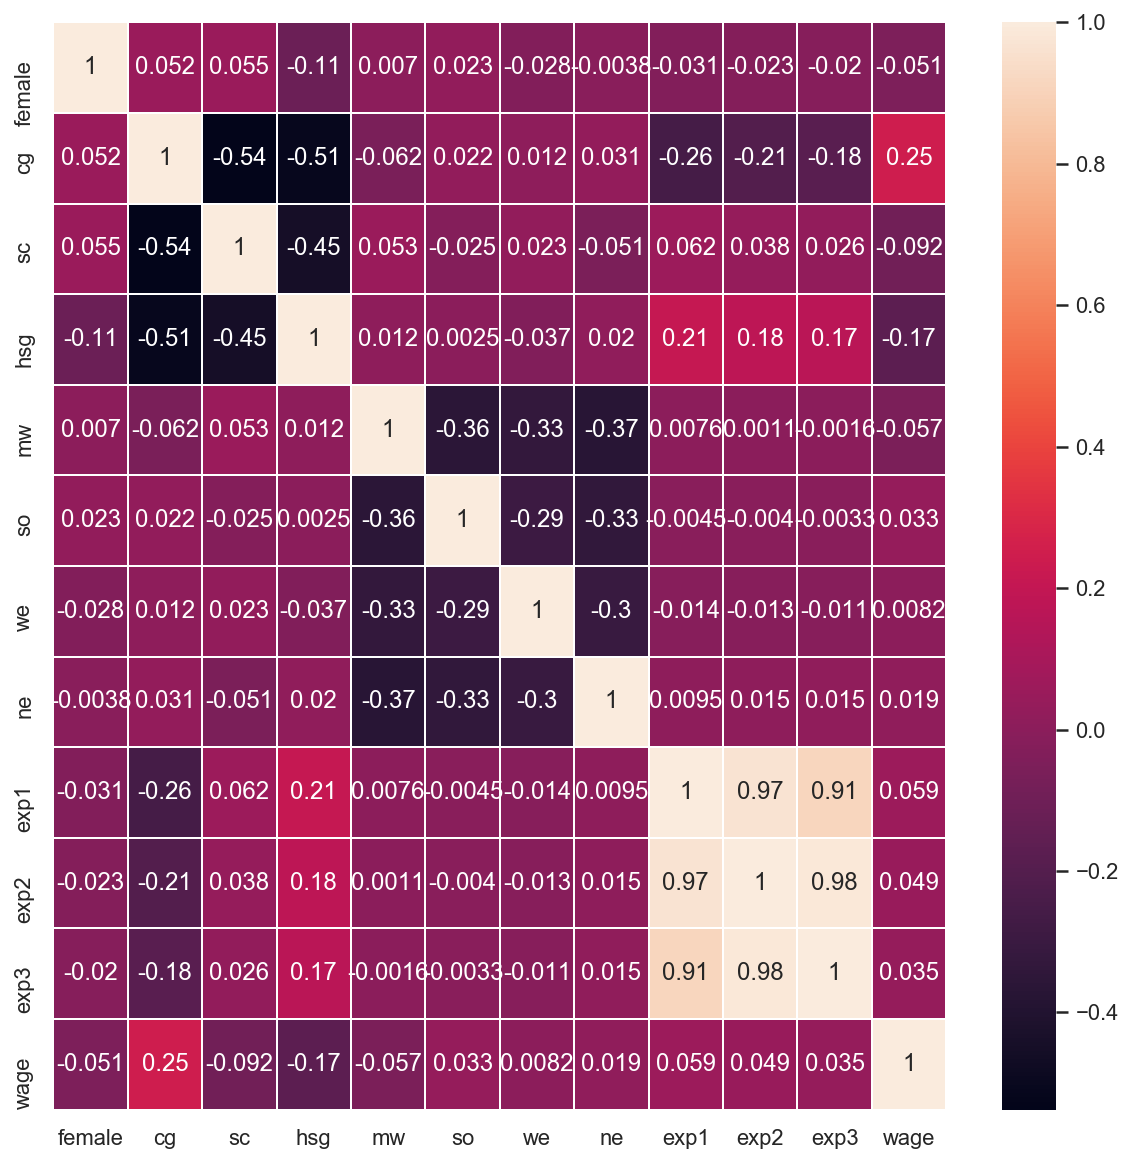

In [9]:
#checking correlation
#Adding graphs for correlation to help out throught the process

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax);

## Preprocessing Data and Scaling

In [10]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Normalizing Numerical Features
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), index=dataset.index, columns=dataset.columns)
dataset_scaled.head(5)

,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3,wage
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.939394,0.888616,0.838151,0.033459
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.757576,0.593776,0.458978,0.036806
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.135135,0.051065,0.016573
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.035784
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393939,0.180999,0.078545,0.053170


## Applying Linear Regression
### Normal and Polynomial for quadratic

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Getting features and target
wages = dataset_scaled['wage']
features = dataset_scaled.drop('wage', axis = 1)

#Quadratic - polynomial features
polynomial_features = PolynomialFeatures(degree=2)
features_poly = polynomial_features.fit_transform(features)


features.head(5)


,female,cg,sc,hsg,mw,so,we,ne,exp1,exp2,exp3
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.939394,0.888616,0.838151
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.757576,0.593776,0.458978
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.135135,0.051065
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.393939,0.180999,0.078545


In [12]:
features_poly


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.89638198e-01, 7.44793904e-01, 7.02496359e-01],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.52569456e-01, 2.72529797e-01, 2.10660592e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.82615047e-02, 6.90066510e-03, 2.60762623e-03],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.86860638e-02, 3.56067709e-02, 1.84585062e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.95806193e-04, 4.69425202e-05, 7.44947285e-06],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.52569456e-01, 2.72529797e-01, 2.10660592e-01]])

In [13]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'wage' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    wages, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Split the 'features' and 'wage' polynomial
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(features_poly, 
                                                    wages, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [14]:
# Normal
# Training linearly regression
reg = LinearRegression()
reg.fit(X_train, y_train)

#Predicting
y_pred = reg.predict(X_test)


###### Polynomial - Quadratic

# Training linearly regression
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train_poly)

#Predicting

y_pred_poly = reg_poly.predict(X_test_poly)


## 

In [15]:
coeff_df = pd.DataFrame(reg.coef_, features.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
female,-4.529182e-03
cg,-2.291148e+11
sc,-2.291148e+11
hsg,-2.291148e+11
mw,-3.665400e+11
so,-3.665400e+11
we,-3.665400e+11
ne,-3.665400e+11
exp1,9.716415e-02
exp2,-1.300545e-01


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(20)

,Actual,Predicted
1077,0.040201,0.039429
1042,0.042066,0.031250
3353,0.050897,0.040283
1764,0.055386,0.053467
2911,0.022488,0.040161
2193,0.102262,0.050415
457,0.034025,0.034668
2430,0.033738,0.035767
45,0.039988,0.047729
3240,0.032715,0.065796


In [17]:
df_poly = pd.DataFrame({'Actual': y_test_poly, 'Predicted': y_pred_poly})


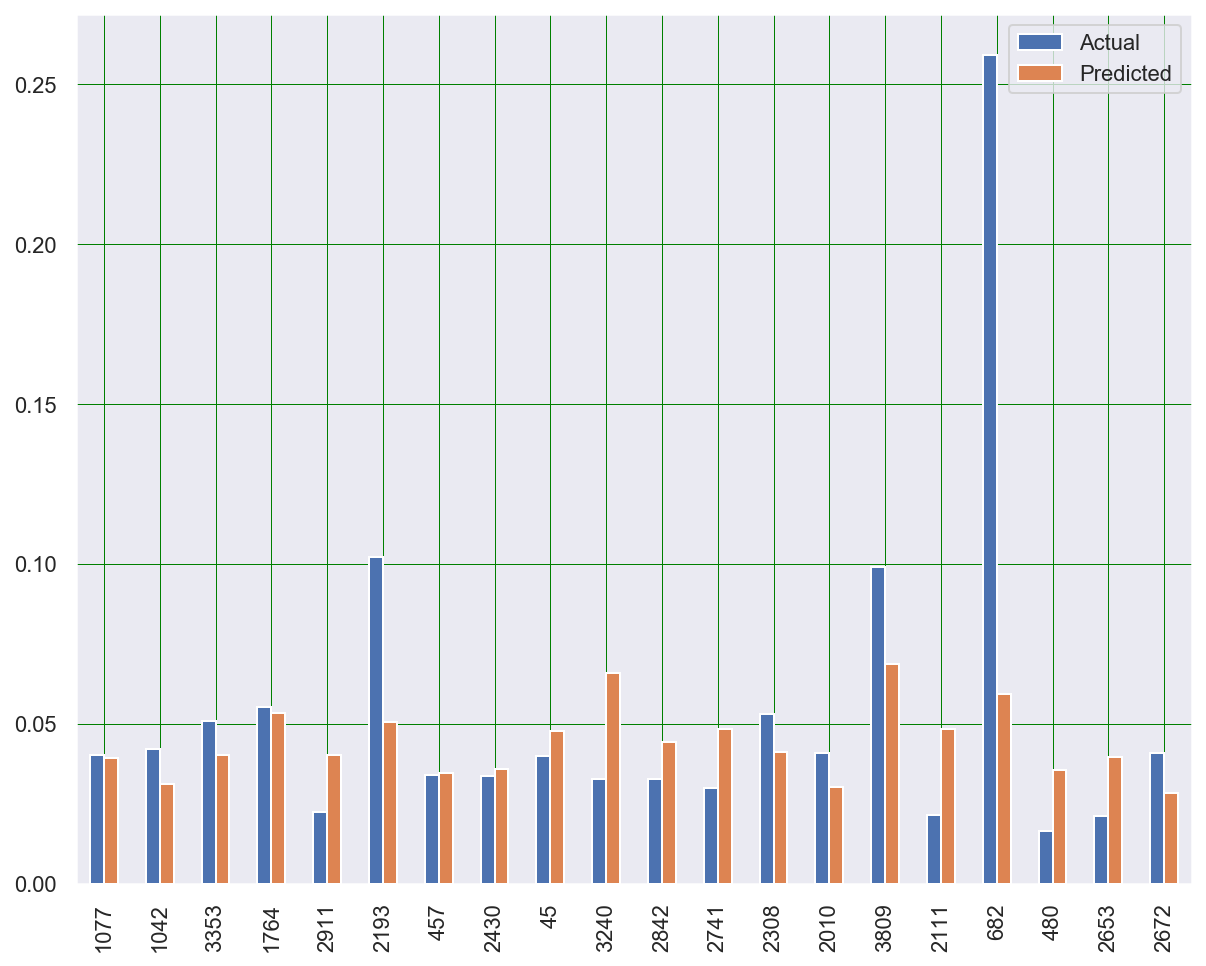

In [18]:
df.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

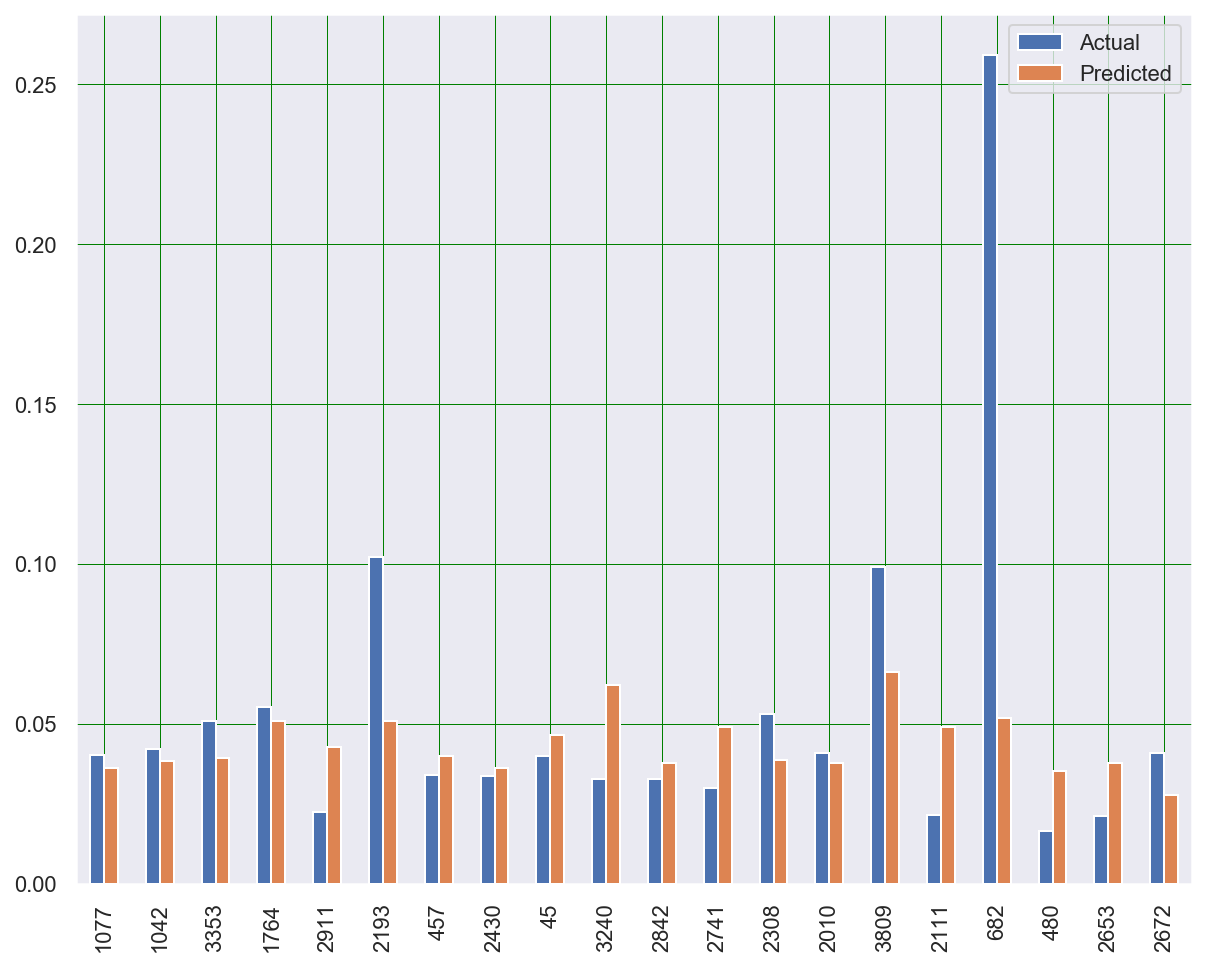

In [19]:
df_poly.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
print ('#### NORMAL ####')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score = reg.score(X_test,y_test)
print("Score: ",score)




#### NORMAL ####
Mean Absolute Error: 0.017143181078725235
Mean Squared Error: 0.0008407312117076736
Root Mean Squared Error: 0.02899536534875313
Score:  0.14093125862222988


In [21]:
print ('#### QUADRATIC ####')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

score_poly = reg_poly.score(X_test_poly,y_test_poly)
print("Score: ",score_poly)


#### QUADRATIC ####
Mean Absolute Error: 0.017470055071547745
Mean Squared Error: 0.0008589268887385051
Root Mean Squared Error: 0.02930745449093976
Score:  0.12233870829494664
